### Dados da Saúde do Coração
#### Logistic regression To predict heart disease
Link para a [Base de dados e Documentação Oficial](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression?select=framingham.csv)

#### 1. Preparando o ambiente: base de dados

In [1]:
import pandas as pd

dados = pd.read_csv('./db-framingham.csv')
dataset = pd.DataFrame(dados)
dataset.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [2]:
dataset.shape

(4238, 16)

In [3]:
dataset.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
dict_eng_port = {
  'male' : 'genero',
  'age' : 'idade',
  'education' : 'escolaridade',
  'currentSmoker' : 'fumante',
  'cigsPerDay' : 'cigarros_por_dia',
  'BPMeds' : 'uso_medicamento_pressao',
  'prevalentStroke' : 'avc',
  'prevalentHyp' : 'hipertensao',
  'diabetes' : 'diabetes',
  'totChol' : 'colesterol_total',
  'sysBP' : 'pressao_arterial_sistolica',
  'diaBP' : 'pressao_arterial_diastolica',
  'BMI' : 'imc',
  'heartRate' : 'freq_cardiaca',
  'glucose' : 'glicemia',
  'TenYearCHD' : 'risco_dac_decada'
}
dataset = dataset.rename(columns=dict_eng_port)
dataset.head()

,genero,idade,escolaridade,fumante,cigarros_por_dia,uso_medicamento_pressao,avc,hipertensao,diabetes,colesterol_total,pressao_arterial_sistolica,pressao_arterial_diastolica,imc,freq_cardiaca,glicemia,risco_dac_decada
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
dataset = dataset.drop(columns=['escolaridade'])
dataset.head()

,genero,idade,fumante,cigarros_por_dia,uso_medicamento_pressao,avc,hipertensao,diabetes,colesterol_total,pressao_arterial_sistolica,pressao_arterial_diastolica,imc,freq_cardiaca,glicemia,risco_dac_decada
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### 2. Trabalhando com Data Frame

In [7]:
dataset.describe()

,genero,idade,fumante,cigarros_por_dia,uso_medicamento_pressao,avc,hipertensao,diabetes,colesterol_total,pressao_arterial_sistolica,pressao_arterial_diastolica,imc,freq_cardiaca,glicemia,risco_dac_decada
count,4238.000000,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
dataset.dtypes

genero                           int64
idade                            int64
fumante                          int64
cigarros_por_dia               float64
uso_medicamento_pressao        float64
avc                              int64
hipertensao                      int64
diabetes                         int64
colesterol_total               float64
pressao_arterial_sistolica     float64
pressao_arterial_diastolica    float64
imc                            float64
freq_cardiaca                  float64
glicemia                       float64
risco_dac_decada                 int64
dtype: object

In [9]:
dataset.cigarros_por_dia.unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., nan, 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,
        7.,  6., 38., 29., 17., 16., 19., 70.])

In [10]:
dataset.isnull().sum()

genero                           0
idade                            0
fumante                          0
cigarros_por_dia                29
uso_medicamento_pressao         53
avc                              0
hipertensao                      0
diabetes                         0
colesterol_total                50
pressao_arterial_sistolica       0
pressao_arterial_diastolica      0
imc                             19
freq_cardiaca                    1
glicemia                       388
risco_dac_decada                 0
dtype: int64

In [11]:
selecao_corretos = dataset.cigarros_por_dia.notnull()
selecao_corretos

0       True
1       True
2       True
3       True
4       True
        ... 
4233    True
4234    True
4235    True
4236    True
4237    True
Name: cigarros_por_dia, Length: 4238, dtype: bool

In [12]:
dataset = dataset[selecao_corretos]
dataset.isnull().sum()

genero                           0
idade                            0
fumante                          0
cigarros_por_dia                 0
uso_medicamento_pressao         53
avc                              0
hipertensao                      0
diabetes                         0
colesterol_total                50
pressao_arterial_sistolica       0
pressao_arterial_diastolica      0
imc                             19
freq_cardiaca                    1
glicemia                       384
risco_dac_decada                 0
dtype: int64

In [13]:
dataset = dataset[dataset.uso_medicamento_pressao.notnull()]
dataset = dataset[dataset.colesterol_total.notnull()]
dataset = dataset[dataset.imc.notnull()]
dataset = dataset[dataset.freq_cardiaca.notnull()]

In [14]:
dataset.isnull().sum()

genero                           0
idade                            0
fumante                          0
cigarros_por_dia                 0
uso_medicamento_pressao          0
avc                              0
hipertensao                      0
diabetes                         0
colesterol_total                 0
pressao_arterial_sistolica       0
pressao_arterial_diastolica      0
imc                              0
freq_cardiaca                    0
glicemia                       339
risco_dac_decada                 0
dtype: int64

In [15]:
dataset.head()

,genero,idade,fumante,cigarros_por_dia,uso_medicamento_pressao,avc,hipertensao,diabetes,colesterol_total,pressao_arterial_sistolica,pressao_arterial_diastolica,imc,freq_cardiaca,glicemia,risco_dac_decada
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### 3. Trabalhando com Dados Faltantes de Glicemia

In [16]:
dataset.isnull().sum()

genero                           0
idade                            0
fumante                          0
cigarros_por_dia                 0
uso_medicamento_pressao          0
avc                              0
hipertensao                      0
diabetes                         0
colesterol_total                 0
pressao_arterial_sistolica       0
pressao_arterial_diastolica      0
imc                              0
freq_cardiaca                    0
glicemia                       339
risco_dac_decada                 0
dtype: int64

In [17]:
pessoas_com_diabetes = dataset[dataset.diabetes == 1]
pessoas_sem_diabetes = dataset[dataset.diabetes == 0]

In [18]:
pessoas_com_diabetes.glicemia.head()
# pessoas com diabetes podem ter glicemia tanto alta como baixa glicemia
# abaixo de 70 hipoglicemia
# entre 71 e 110 normal
# entre 111 e 126 pre diabetes
# acima de 127 diabetes

37    225.0
44    215.0
56     55.0
66    202.0
96    126.0
Name: glicemia, dtype: float64

In [19]:
pessoas_com_diabetes.glicemia.mean()

169.87254901960785

In [20]:
pessoas_sem_diabetes.glicemia.mean()

79.42226487523992

In [21]:
dataset.glicemia.mean()

81.88316884502534

In [22]:
dataset.glicemia.describe()

count    3749.000000
mean       81.883169
std        23.888039
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glicemia, dtype: float64

In [23]:
dataset.diabetes.value_counts()

0    3984
1     104
Name: diabetes, dtype: int64

/tmp/ipykernel_2204/474504278.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(pessoas_com_diabetes.glicemia, norm_hist=False)


(0.0, 400.0)

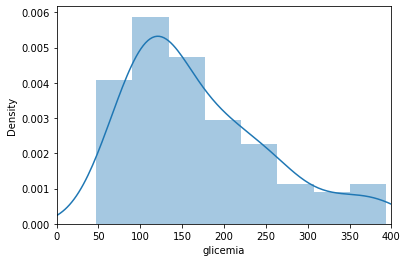

In [24]:
import seaborn as sns

ax = sns.distplot(pessoas_com_diabetes.glicemia, norm_hist=False)
ax.set_xlim(0, 400)

/tmp/ipykernel_2204/2351432675.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(pessoas_sem_diabetes.glicemia, norm_hist=False)


(0.0, 400.0)

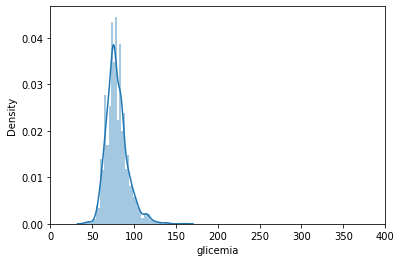

In [25]:
import seaborn as sns

ax = sns.distplot(pessoas_sem_diabetes.glicemia, norm_hist=False)
ax.set_xlim(0, 400)

In [26]:
nulos_glicemia = dataset.glicemia.isnull()

In [27]:
dataset[nulos_glicemia].diabetes.value_counts()
# dos dados sem glicemia 339, 337 não tem diabetes e 2 tem diabetes, então não vale a pena fazer manipulação de dados para 2 pessoas com diabetes
# assim podemos simplesmente descartar as pessoas que não tem dados de glicemia, pois 99% delas são pessoas sem diabetes 

0    337
1      2
Name: diabetes, dtype: int64

In [28]:
dataset.glicemia.mean()

81.88316884502534

In [29]:
dataset.fillna({'glicemia': 81.88}, inplace=True)

In [30]:
dataset.isnull().sum()

genero                         0
idade                          0
fumante                        0
cigarros_por_dia               0
uso_medicamento_pressao        0
avc                            0
hipertensao                    0
diabetes                       0
colesterol_total               0
pressao_arterial_sistolica     0
pressao_arterial_diastolica    0
imc                            0
freq_cardiaca                  0
glicemia                       0
risco_dac_decada               0
dtype: int64

#### 4. Preparação de Dados - convertendo tipos

In [31]:
dataset.head()

,genero,idade,fumante,cigarros_por_dia,uso_medicamento_pressao,avc,hipertensao,diabetes,colesterol_total,pressao_arterial_sistolica,pressao_arterial_diastolica,imc,freq_cardiaca,glicemia,risco_dac_decada
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [33]:
dataset.shape

(4088, 15)

In [34]:
dataset.dtypes

genero                           int64
idade                            int64
fumante                          int64
cigarros_por_dia               float64
uso_medicamento_pressao        float64
avc                              int64
hipertensao                      int64
diabetes                         int64
colesterol_total               float64
pressao_arterial_sistolica     float64
pressao_arterial_diastolica    float64
imc                            float64
freq_cardiaca                  float64
glicemia                       float64
risco_dac_decada                 int64
dtype: object

In [42]:
# converte tipos de dados nos lugares especificados
dataset = dataset.astype({'uso_medicamento_pressao': 'int64'})
dataset.dtypes

genero                           int64
idade                            int64
fumante                          int64
cigarros_por_dia               float64
uso_medicamento_pressao          int64
avc                              int64
hipertensao                      int64
diabetes                         int64
colesterol_total               float64
pressao_arterial_sistolica     float64
pressao_arterial_diastolica    float64
imc                            float64
freq_cardiaca                  float64
glicemia                       float64
risco_dac_decada                 int64
dtype: object

In [43]:
dataset = dataset.astype({'cigarros_por_dia': 'int64'})
dataset.dtypes

genero                           int64
idade                            int64
fumante                          int64
cigarros_por_dia                 int64
uso_medicamento_pressao          int64
avc                              int64
hipertensao                      int64
diabetes                         int64
colesterol_total               float64
pressao_arterial_sistolica     float64
pressao_arterial_diastolica    float64
imc                            float64
freq_cardiaca                  float64
glicemia                       float64
risco_dac_decada                 int64
dtype: object

In [44]:
dataset.head()

,genero,idade,fumante,cigarros_por_dia,uso_medicamento_pressao,avc,hipertensao,diabetes,colesterol_total,pressao_arterial_sistolica,pressao_arterial_diastolica,imc,freq_cardiaca,glicemia,risco_dac_decada
0,1,39,0,0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### 5. Executando transformações - Categorias

In [45]:
dataset.cigarros_por_dia.describe()

count    4088.000000
mean        8.992417
std        11.910941
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigarros_por_dia, dtype: float64

/tmp/ipykernel_2204/2776941361.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset.cigarros_por_dia, norm_hist=False )


(0.0, 70.0)

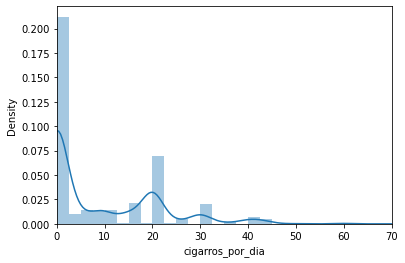

In [46]:
ax = sns.distplot(dataset.cigarros_por_dia, norm_hist=False )
ax.set_xlim(0,70)

In [47]:
dataset.cigarros_por_dia.value_counts()

0     2084
20     714
30     208
15     206
10     140
9      124
5      121
3       93
40      77
1       66
43      55
25      53
35      22
2       17
6       17
7       12
60      11
8       10
4        9
17       7
18       7
23       6
50       5
11       5
45       3
13       3
12       3
16       3
14       2
19       2
38       1
29       1
70       1
Name: cigarros_por_dia, dtype: int64

In [49]:
dataset.fumante.value_counts()

0    2084
1    2004
Name: fumante, dtype: int64

<AxesSubplot: >

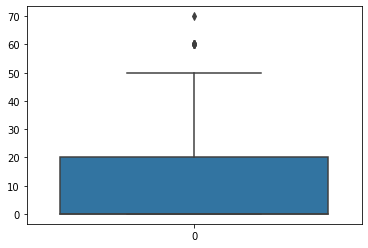

In [50]:
sns.boxplot(dataset.cigarros_por_dia)

In [51]:
dataset.cigarros_por_dia.mean()

8.992416829745597

In [52]:
# categorias de fumantes
# 0 = não fumante
# 1 =  fumante leve (1 até 10)
# 2 =  fumante moderado (11 até 20)
# 3 =  fumante severo (mais de 20 cigarros)

limites = [-1, 1, 11, 20, 71]
categorias = [0, 1, 2, 3]

fumante_categorico = pd.cut(dataset.cigarros_por_dia, limites, labels=categorias)

In [57]:
fumante_categorico

0       0
1       0
2       2
3       3
4       3
       ..
4232    0
4233    0
4234    3
4236    2
4237    0
Name: cigarros_por_dia, Length: 4088, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [60]:
dataset = dataset.assign(fumante_categorico = fumante_categorico)
dataset.head()

,genero,idade,fumante,cigarros_por_dia,uso_medicamento_pressao,avc,hipertensao,diabetes,colesterol_total,pressao_arterial_sistolica,pressao_arterial_diastolica,imc,freq_cardiaca,glicemia,risco_dac_decada,fumante_categorico
0,1,39,0,0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0
1,0,46,0,0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0
2,1,48,1,20,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,2
3,0,61,1,30,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,3
4,0,46,1,23,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,3


In [61]:
dataset.columns

Index(['genero', 'idade', 'fumante', 'cigarros_por_dia',
       'uso_medicamento_pressao', 'avc', 'hipertensao', 'diabetes',
       'colesterol_total', 'pressao_arterial_sistolica',
       'pressao_arterial_diastolica', 'imc', 'freq_cardiaca', 'glicemia',
       'risco_dac_decada', 'fumante_categorico'],
      dtype='object')

#### Visualizando Dados